### Linear Regression Model - RMSE Observation

#### Load Dataset

In [93]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [94]:
# Load Dataset
path = 'dataset.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,GP,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,0.163194,0.162511,0.160432,0.164897,0.156504,0.152832,0.153384,0.160395,0.175573,0.162624,0.156
1,2023-09-08 02:39:25,0.154760,0.152053,0.144265,0.162623,0.153077,0.151156,0.146197,0.153188,0.145541,0.154248,0.154
2,2023-09-08 02:39:30,0.148360,0.141814,0.127706,0.166745,0.143333,0.146130,0.132894,0.148120,0.126703,0.148889,0.128
3,2023-09-08 02:39:35,0.143503,0.129723,0.112419,0.171119,0.140257,0.148420,0.128580,0.147683,0.137833,0.141520,0.154
4,2023-09-08 02:39:40,0.139819,0.114421,0.099374,0.168747,0.137189,0.150421,0.130127,0.148424,0.136489,0.128825,0.162


#### Find Pearson Correlation

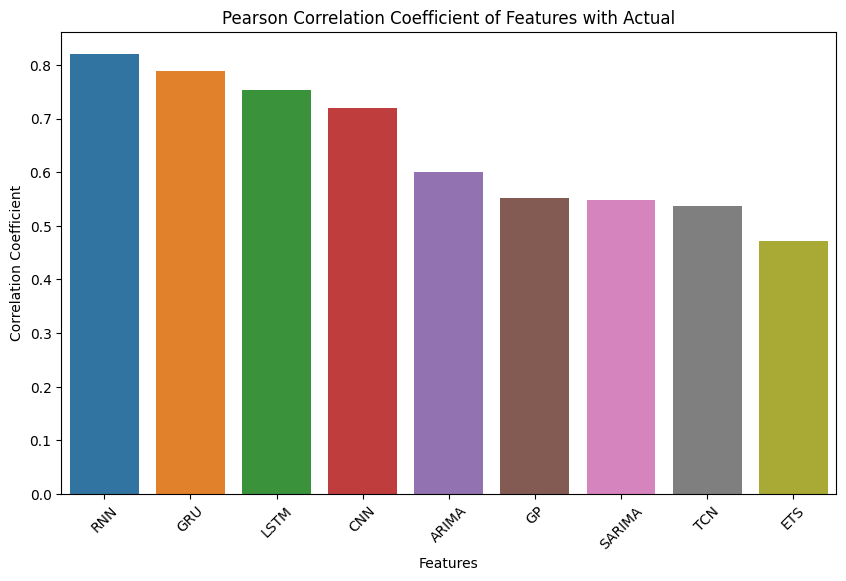

,Correlation with Actual
RNN,0.820454
GRU,0.788082
LSTM,0.753682
CNN,0.720430
ARIMA,0.600831
GP,0.551098
SARIMA,0.547688
TCN,0.536074
ETS,0.472063


In [95]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'GP', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
target = 'Actual'
raw = 'Raw'
correlations = {feature: pearsonr(data[feature], data[target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Actual'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted['Correlation with Actual'])
plt.title('Pearson Correlation Coefficient of Features with Actual')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [96]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[target])
compare_rmse_column = data[raw].dropna().iloc[1000:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:1000]
test_data = cleaned_data.iloc[1000:]

#### Linear Regression

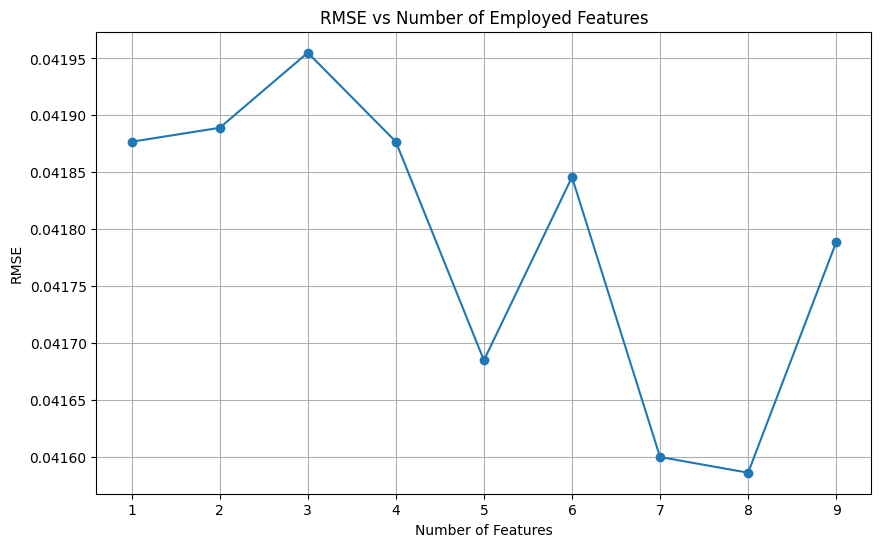

[0.041876752585611327,
 0.04188901219841498,
 0.041955019425251275,
 0.04187681843634956,
 0.04168459202785836,
 0.04184564114767081,
 0.04159958797376532,
 0.04158574540404645,
 0.0417884106330422]

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

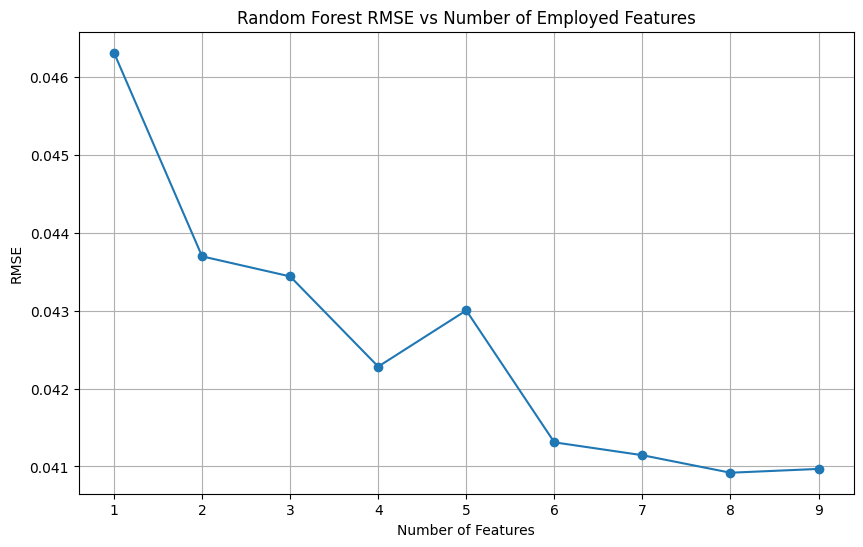

[0.04631333207423485,
 0.04369791774619194,
 0.0434402175764135,
 0.04228179193765852,
 0.043003340160802594,
 0.041309095061385075,
 0.041143699441374526,
 0.04091874631857437,
 0.04096758160496592]

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

8/8 [==============================] - 0s 2ms/step


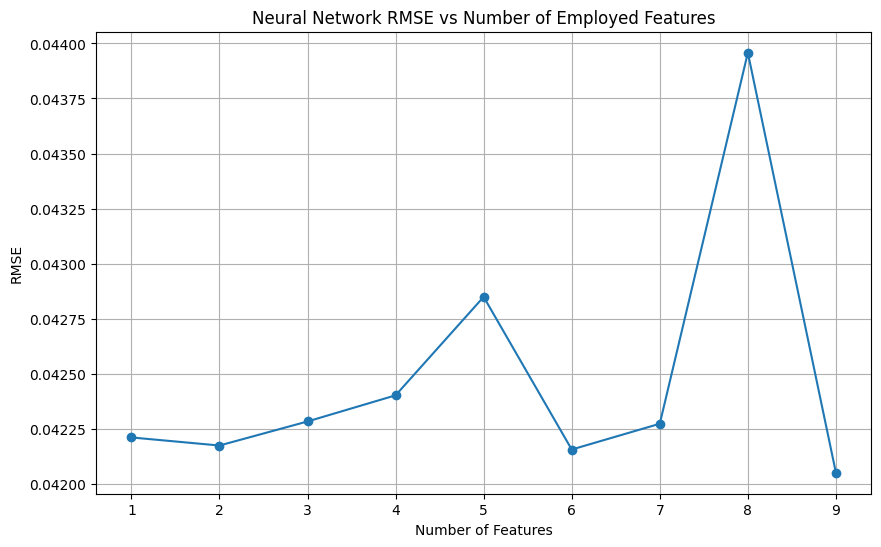

[0.042210669029271536,
 0.04217401270465611,
 0.042283265380115245,
 0.04240194766933186,
 0.04284902468224421,
 0.04215579970662644,
 0.04227288854522137,
 0.04395767018695673,
 0.04205046516525903]

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[target].values
    y_test = test_data[target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values

#### Weighted Average

Using top 1 features
Using top 2 features
Using top 3 features
Using top 4 features
Using top 5 features
Using top 6 features
Using top 7 features
Using top 8 features
Using top 9 features


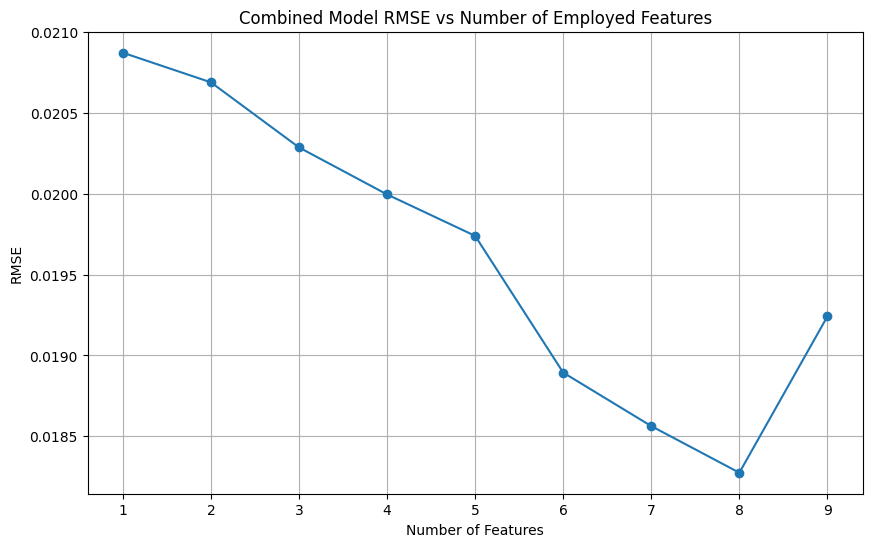

[0.020873096727542846,
 0.02068978337495801,
 0.020287016206591527,
 0.019996160209135822,
 0.0197396848095442,
 0.01889361333545671,
 0.0185627441948245,
 0.01827412288723554,
 0.019241589511322016]

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# List to store RMSE values for combined model predictions
combined_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    print(f"Using top {i} features")
    selected_features = sorted_features[:i]
    
    # Preparing data
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[target].values
    y_test = test_data[target].values

    # Initialize models
    linear_model = LinearRegression()
    rf_model = RandomForestRegressor()
    nn_model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])
    nn_model.compile(optimizer="adam", loss="mse")

    # Train models
    linear_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Initial weights
    weights = {'linear': 1/3, 'random_forest': 1/3, 'neural_network': 1/3}
    cumulative_predictions = np.zeros(len(X_test))
    cumulative_linear_predictions = np.zeros(len(X_test))
    cumulative_rf_predictions = np.zeros(len(X_test))
    cumulative_nn_predictions = np.zeros(len(X_test))
    cumulative_actuals = np.zeros(len(X_test))

    # Nested loop for dynamic weight adjustment
    for t in range(len(X_test)):
        # Predicting one value at a time
        linear_pred = linear_model.predict([X_test[t]])[0]
        rf_pred = rf_model.predict([X_test[t]])[0]
        nn_pred = nn_model.predict([X_test[t:t+1]], verbose=0).flatten()[0]

        # Update cumulative predictions and actuals
        cumulative_predictions[t] = linear_pred * weights['linear'] + rf_pred * weights['random_forest'] + nn_pred * weights['neural_network']
        cumulative_linear_predictions[t] = linear_pred
        cumulative_rf_predictions[t] = rf_pred
        cumulative_nn_predictions[t] = nn_pred
        cumulative_actuals[t] = y_test[t]

        # Update RMSE and weights if not the first iteration
        if t > 0:
            # Update RMSE based on cumulative data
            historical_rmse = {
                'linear': mean_squared_error(cumulative_actuals[:t+1], cumulative_linear_predictions[:t+1], squared=False),
                'random_forest': mean_squared_error(cumulative_actuals[:t+1], cumulative_rf_predictions[:t+1], squared=False),
                'neural_network': mean_squared_error(cumulative_actuals[:t+1], cumulative_nn_predictions[:t+1], squared=False)
            }

            # Update weights
            exp_weights = {model: np.exp(-1 * rmse) for model, rmse in historical_rmse.items()}
            total_weight = sum(exp_weights.values())
            weights = {model: weight / total_weight for model, weight in exp_weights.items()}

    # Calculate RMSE for combined predictions
    combined_rmse = mean_squared_error(y_test, cumulative_predictions, squared=False)
    combined_rmse_values.append(combined_rmse)

# Plotting the graph of RMSE vs number of employed features for the combined model
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), combined_rmse_values, marker='o')
plt.title('Combined Model RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for the combined model
combined_rmse_values